In [3]:
!pip install plotly

In [99]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import requests
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD, Adam
plt.style.use('bmh')

In [100]:
!matplotlib inline

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


In [101]:
'''
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400
'''


'\nhttps://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400\n'

In [102]:
ret = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400')

In [103]:
ret

<Response [200]>

In [104]:
js= ret.json()
js

[{'date': 1424304000,
  'high': 244,
  'low': 225,
  'open': 225,
  'close': 244,
  'volume': 46.27631267,
  'quoteVolume': 0.19311748,
  'weightedAverage': 239.62777823},
 {'date': 1424390400,
  'high': 245,
  'low': 240.25,
  'open': 240.25011809,
  'close': 240.25,
  'volume': 55.894897,
  'quoteVolume': 0.23042935,
  'weightedAverage': 242.56847926},
 {'date': 1424476800,
  'high': 245,
  'low': 245,
  'open': 245,
  'close': 245,
  'volume': 14.72223865,
  'quoteVolume': 0.06009077,
  'weightedAverage': 245},
 {'date': 1424563200,
  'high': 249,
  'low': 235,
  'open': 245,
  'close': 235,
  'volume': 129.12124785,
  'quoteVolume': 0.53905499,
  'weightedAverage': 239.53260845},
 {'date': 1424649600,
  'high': 235.001,
  'low': 235,
  'open': 235.00000236,
  'close': 235,
  'volume': 96.56756248,
  'quoteVolume': 0.41092569,
  'weightedAverage': 235.00006166},
 {'date': 1424736000,
  'high': 239.75,
  'low': 235,
  'open': 235,
  'close': 239.75,
  'volume': 149.15439319,
  'quote

In [105]:
df= pd.DataFrame(js)

In [106]:
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000000,225.000000,225.000000,244.000000,4.627631e+01,0.193117,239.627778
1,1424390400,245.000000,240.250000,240.250118,240.250000,5.589490e+01,0.230429,242.568479
2,1424476800,245.000000,245.000000,245.000000,245.000000,1.472224e+01,0.060091,245.000000
3,1424563200,249.000000,235.000000,245.000000,235.000000,1.291212e+02,0.539055,239.532608
4,1424649600,235.001000,235.000000,235.000002,235.000000,9.656756e+01,0.410926,235.000062
...,...,...,...,...,...,...,...,...
2586,1647734400,42275.251821,40919.255124,42196.264992,41250.308283,8.375151e+06,201.834517,41495.136669
2587,1647820800,41531.500846,40500.000000,41260.158661,41000.449464,9.073900e+06,221.057318,41047.723769
2588,1647907200,43300.000000,40880.465958,40992.250707,42357.182148,1.622649e+07,382.182971,42457.388660
2589,1647993600,43005.956876,41714.172112,42357.414249,42889.167867,8.405755e+06,198.967071,42246.964808


In [107]:
df.describe()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
count,2.591000e+03,2591.000000,2591.000000,2591.000000,2591.000000,2.591000e+03,2591.000000,2591.000000
mean,1.536192e+09,12669.718657,11905.979799,12311.135903,12327.622995,1.957306e+07,2321.307369,12293.809505
std,6.463598e+07,17002.836531,15995.469664,16535.799951,16545.316221,2.993502e+07,4389.885678,16509.019390
min,1.424304e+09,219.010000,99.000000,191.300000,178.719313,0.000000e+00,0.000000,207.450144
25%,1.480248e+09,765.258505,734.550000,751.560000,752.770000,6.548154e+05,297.743345,748.165394
50%,1.536192e+09,6799.000000,6520.100001,6659.955305,6674.063726,9.004374e+06,861.986270,6651.299989
75%,1.592136e+09,11449.308350,10768.637051,11077.507284,11079.034300,2.615397e+07,2226.998291,11092.740616
max,1.648080e+09,69000.000000,66264.546095,67480.458536,67523.947762,3.960385e+08,48896.616808,67407.001192


In [108]:
scaler = MinMaxScaler()
df[['close']] = scaler.fit_transform(df[['close']])

In [109]:
price = df['close'].values.tolist()

In [110]:
price

[0.0009693439164567483,
 0.0009136606841575663,
 0.0009841927784031966,
 0.0008357041589387116,
 0.0008357041589387116,
 0.0009062362531843419,
 0.0008765385292914449,
 0.0008876751757512812,
 0.001043588226188991,
 0.0009099493633148862,
 0.001073285950081888,
 0.0013405654651179612,
 0.0013141344907047947,
 0.0015039029465288953,
 0.0011623809036240126,
 0.0012069257075999246,
 0.0012069257851109838,
 0.0012069261680631334,
 0.0012663212345301535,
 0.0016672404279398294,
 0.0014445074988915902,
 0.0014445075153738268,
 0.00143129201294716,
 0.0014311435283368879,
 0.0015352043528575996,
 0.0014296586367966526,
 0.0014296586372421192,
 0.0012379598292164905,
 0.0012788879723597455,
 0.0012597999946426272,
 0.0012543378657217147,
 0.001318542352209373,
 0.0012169265851009066,
 0.0009474493788043338,
 0.001020951357102696,
 0.0009474492695167097,
 0.0011082208675832973,
 0.0010395566975083328,
 0.0010282839497951332,
 0.001123071118640781,
 0.0010486150063751093,
 0.001043588226188991,


In [111]:
''' RNN Model
Many to Many
Many to One

X [ 5, 1], Y [ sample, 1]'''

' RNN Model\nMany to Many\nMany to One\n\nX [ 5, 1], Y [ sample, 1]'

In [112]:
window_size=5
X = []
Y = []

In [113]:
# ... len(price) - window_size
for i in range(len(price) - window_size) :
    i = 0
    X.append( [price[i + j] for j in range(window_size)] )
    Y.append(price[window_size + i])


In [114]:
X = np.asarray(X)
Y = np.asarray(Y)
print(X)
print(Y)

[[0.00096934 0.00091366 0.00098419 0.0008357  0.0008357 ]
 [0.00096934 0.00091366 0.00098419 0.0008357  0.0008357 ]
 [0.00096934 0.00091366 0.00098419 0.0008357  0.0008357 ]
 ...
 [0.00096934 0.00091366 0.00098419 0.0008357  0.0008357 ]
 [0.00096934 0.00091366 0.00098419 0.0008357  0.0008357 ]
 [0.00096934 0.00091366 0.00098419 0.0008357  0.0008357 ]]
[0.00090624 0.00090624 0.00090624 ... 0.00090624 0.00090624 0.00090624]


In [115]:
train_test_split = 2000 # 577
X_train = X[:train_test_split, :]
y_train = Y[:train_test_split]

X_test = X[train_test_split:, :]
y_test = Y[train_test_split:]

In [116]:
X_test.shape
y_test.shape

(586,)

In [117]:
X_train[0]

array([0.00096934, 0.00091366, 0.00098419, 0.0008357 , 0.0008357 ])

In [118]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))

In [121]:
# Build a RNN model
# 1. input
i = Input(shape = (window_size, 1)) # T x D
# 2. simpleRNN
x = SimpleRNN(128)(i)
# 3. Dense
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

In [122]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [124]:
# Method 2
model = Sequential()
model.add(SimpleRNN(128, input_shape = (5, 1, ), activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(X_train, y_train, epochs = 30, batch_size =1)

Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 3.5797e-09
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 6.7713e-10
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 9.3862e-09
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 6.3968e-21
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 1.7391e-09
Epoch 6/30
2000/2000 [==============================] - 3s 1ms/step - loss: 8.0168e-10
Epoch 7/30
2000/2000 [==============================] - 3s 1ms/step - loss: 9.4096e-10
Epoch 8/30
2000/2000 [==============================] - 3s 1ms/step - loss: 1.0392e-09
Epoch 9/30
2000/2000 [==============================] - 3s 1ms/step - loss: 3.9547e-10
Epoch 10/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.0000e+00
Epoch 11/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.0000e+00
Epoch 12/30
2000/2000 [==================

In [127]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

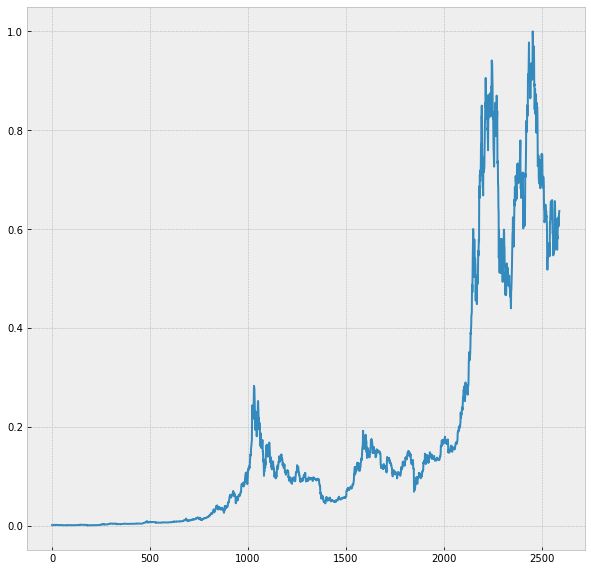

In [128]:
plt.figure(figsize=(10,10))
plt.plot(price)